# 《数据采集与清洗》
## 第一次作业内容： 网页抓取
### 具体目标：
+ 用``urllib.requests``库发起一次``get``请求，输出``response``文本信息；
+ 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息；
+ 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容；
+ 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果；
+ 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果；
+ (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。

### 注：
+ 代码要有注释，结果要有分析；
+ 本次作业提交截至时间：2020年3月10日(星期二)；
+ 文件命名规则: 班级号+学号+姓名+作业序号，示例：``1_20188989899_张三_1``；
+ 提交方式：1班发送至邮箱：632994085@qq.com；2班发送至邮箱：786888939@qq.com.

### 问题1：用``urllib.requests``库发起一次``get``请求，输出``response``文本信息。

<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"
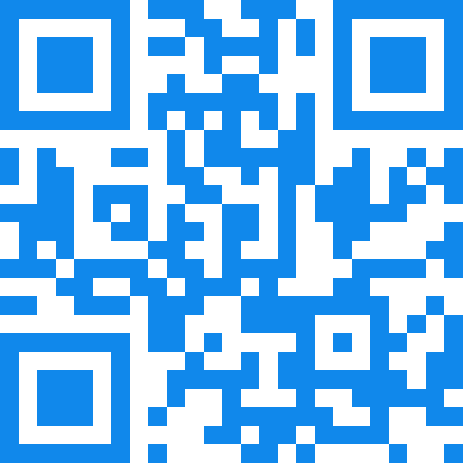

In [5]:
# 这里编写代码
import urllib.request
url ='https://www.zhihu.com/signin?next=%2F'#输入网址
req = urllib.request.Request(url=url, method='GET')#以GET请求方式
response = urllib.request.urlopen(req)   #发送请求
print(response.read().decode('utf-8')) #输出结果

这里对结果进行分析。

### 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息。

In [10]:
# 这里编写代码
import requests
headers={
    'User-Agent':'Mozilla/4.0(compatible; MSIE 5.5; Windows NT)', 'hose':'httpbin.org'
} #火狐浏览器
payload_tuples = [('key1','value1'), ('key2','value2')]  
r = requests.post('http://www.cninfo.com.cn/new/index', data=payload_tuples, headers=headers) #以POST请求方式
print(r.text) #输出结果

<!doctype html><html lang="en"><head><title>HTTP Status 405 – Method Not Allowed</title><style type="text/css">H1 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:22px;} H2 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:16px;} H3 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:14px;} BODY {font-family:Tahoma,Arial,sans-serif;color:black;background-color:white;} B {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;} P {font-family:Tahoma,Arial,sans-serif;background:white;color:black;font-size:12px;}A {color : black;}A.name {color : black;}HR {color : #525D76;}</style></head><body><h1>HTTP Status 405 – Method Not Allowed</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Request method 'POST' not supported</p><p><b>Description</b> The method received in the request-line is known by the origin server but not supported by the target resour

这里对结果进行分析。

### 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容。 

In [ ]:
import re,requests
s = requests.Session() # 构造session对象 
s.get('http://httpbin.org/cookies/set/sessioncookies/987654321') # 用session对象发出get请求，设置cookies 
# 用session对象发出另外一个get请求，获取cookies 
r = s.get("http://httpbin.org/cookies") 
# 显示结果 
print(r.text)

这里对结果进行分析。

### 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果。


In [26]:
# 这里编写代码
import requests,re #正则表达式
count = 10 #记数器
seed = 'http://www.baidu.com/'#设置种子
storage = set()    #构造集合
r = re.compile(r'href=[\''']?(http[^\'''>]+)')#创建为模式对象
headers = {
    'User-Agent':'Mozilla/4.0(compatible; MSIE 5.5; Windows NT)', 'hose':'httpbin.org'
}       #火狐浏览器
queue = [seed]  #种子放入队列中
while len(queue) > 0 and count > 0: #while循环,当队列为空时和记数器为0时结束
    try:
        url = queue.pop(0)    #使用pop方法弹出队列的第一个元素
        html = requests.get(url,params=headers).text#使用requests库中的get函数发送请求，并返回请求结果
        storage.add(url)   #将爬取的元素加入到集合storage中
        new_urls = r.findall(html)#使用findall函数，将在字符串中找到的正则表达式所匹配的所有字串并返回一个列表
        for new_url in new_urls:
            if new_url not in storage:    #如果该元素不在集合中
                queue.extend(new_urls)    #则将其加入对列中
        count = count - 1    #减一
    except Exception as e:    #如果try部分出错不运行，就执行except内容
        print(url)
        print(e)

http://news.baidu.com name=tj_trnews class=mnav
HTTPConnectionPool(host='news.baidu.com%20name=tj_trnews%20class=mnav', port=80): Max retries exceeded with url: /?User-Agent=Mozilla%2F4.0%28compatible%3B+MSIE+5.5%3B+Windows+NT%29&hose=httpbin.org (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000012EAE537978>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
http://www.hao123.com name=tj_trhao123 class=mnav
HTTPConnectionPool(host='www.hao123.com%20name=tj_trhao123%20class=mnav', port=80): Max retries exceeded with url: /?User-Agent=Mozilla%2F4.0%28compatible%3B+MSIE+5.5%3B+Windows+NT%29&hose=httpbin.org (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000012EAE537908>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
http://map.baidu.com name=tj_trmap class=mnav
HTTPConnectionPool(host='map.baidu.com%20name=tj_trmap%20class=mnav', port=80): Max retries exceeded with url: /?U

这里对结果进行分析。

### 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果。 

In [25]:
import requests,re #导入requests库，re库（正则表达式）
seed = 'http://www.baidu.com/'#设置种子
count = 10 #记数器设置为10
headers = {
    'User-Agent':'Mozilla/4.0(compatible; MSIE 5.5; Windows NT)', 'hose':'httpbin.org'
}       #伪装成火狐浏览器
r = re.compile(r'href=[\''']?(http[^\'''>]+)')#调用re库中的compile函数，将正则表达式创建为模式对象
storage = set()    #构造一个集合对象
queue = [seed]  #将网站放入队列中
while len(queue) > 0 and count > 0: #while循环,当队列为空时且记数器为0时结束
    try:
        url = queue.pop(0)    #使用pop方法弹出队列的第一个元素
        html = requests.get(url,params=headers).text#使用get函数发送请求
        storage.add(url)   #将爬取的元素加入到集合storage中
        new_urls = r.findall(html)#使用re库中的findall函数，将在字符串中找到的正则表达式所匹配的所有字串并返回一个列表
        for new_url in new_urls:
            if new_url not in storage:    #如果这个元素不在集合中
                queue.extend(new_urls)    #则将其加入队列中
        count = count - 1    #减一
    except Exception as e:    #如果try部分出错了不运行，就执行except部分
        print(url)
        print(e)

http://news.baidu.com name=tj_trnews class=mnav
HTTPConnectionPool(host='news.baidu.com%20name=tj_trnews%20class=mnav', port=80): Max retries exceeded with url: /?User-Agent=Mozilla%2F4.0%28compatible%3B+MSIE+5.5%3B+Windows+NT%29&hose=httpbin.org (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000012EAE5374E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
http://www.hao123.com name=tj_trhao123 class=mnav
HTTPConnectionPool(host='www.hao123.com%20name=tj_trhao123%20class=mnav', port=80): Max retries exceeded with url: /?User-Agent=Mozilla%2F4.0%28compatible%3B+MSIE+5.5%3B+Windows+NT%29&hose=httpbin.org (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000012EAE537358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
http://map.baidu.com name=tj_trmap class=mnav
HTTPConnectionPool(host='map.baidu.com%20name=tj_trmap%20class=mnav', port=80): Max retries exceeded with url: /?U

这里对结果进行分析。

### (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。 

In [6]:
# 这里编写代码

In [7]:
# 测试

这里对结果进行分析。